In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  mean_squared_error, f1_score, roc_auc_score


##### Data loading and Preparation

In [2]:
train_df = pd.read_csv("Train.csv")

In [3]:
train_df.shape

(7736, 21)

In [4]:
train_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target
0,ID_00008683,Female,20,Black African,Dwelling/house or brick/concrete block structu...,Formal,North West,NW - Non Metro,66710095,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,Xitsonga,Setswana,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0
1,ID_00061163,Female,42,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,98510279,South Africa,Other relative (e.g. in-laws or aunt/uncle) of...,Living together like husband and wife,Sepedi,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),Yes,No,No,Not applicable,Permanent,0
2,ID_00071403,Female,86,Black African,Dwelling/house or brick/concrete block structu...,Formal,Eastern Cape,EC - Non Metro,29210321,South Africa,Father/mother/stepfather/stepmother of person 01,Widowed,IsiXhosa,IsiXhosa,Unspecified,No,No,No,No,Not applicable,0
3,ID_00077803,Female,20,Black African,Town house (semi-detached house in complex),Formal,KwaZulu-Natal,KZN - eThekwini,59913860,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,IsiZulu,IsiZulu,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0
4,ID_00086763,Female,26,Black African,Town house (semi-detached house in complex),Formal,Gauteng,GP - City of Johannesburg,79813828,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,Setswana,English,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0


In [5]:
train_df.columns

Index(['ID', 'gender', 'age', 'race', 'dwelling', 'dwelling_type',
       'province_code', 'metro_code', 'psu', 'nationality', 'RTH',
       'marital_st', 'Lang_inside', 'Lang_outside', 'Education', 'lw_work',
       'lw_business', 'help_on_household', 'job_or_business', 'nature_of_work',
       'target'],
      dtype='object')

#### Data Visualisation

##### Visualize

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


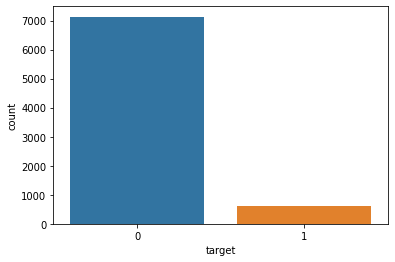

In [6]:
sns.countplot(train_df["target"])

In [7]:
#checking null values
train_df.isna().sum()

ID                   0
gender               0
age                  0
race                 0
dwelling             0
dwelling_type        0
province_code        0
metro_code           0
psu                  0
nationality          0
RTH                  0
marital_st           0
Lang_inside          0
Lang_outside         0
Education            0
lw_work              0
lw_business          0
help_on_household    0
job_or_business      0
nature_of_work       0
target               0
dtype: int64

In [8]:
#Checking the correlation between the each feature and the target
train_df[train_df.columns[1:]].corr()['target'][:]

age      -0.085340
psu      -0.046302
target    1.000000
Name: target, dtype: float64

In [9]:
print(train_df['target'].value_counts())

0    7131
1     605
Name: target, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


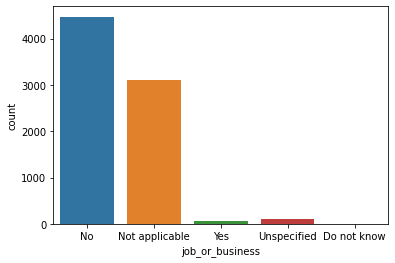

In [10]:
sns.countplot(train_df["job_or_business"])

- Try to create more visualisation from the other columns, what is the level of education of individual in the dataset.
- What about coorelation of other columns to the target.

##### Handling Categorical columns
- There are various way of encoding categorical columns. In the case below we're using label encoding 
<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html>.
- Find out other ways of encoding categorical columns, like one hot encoding - which one works better on this case.

In [11]:
#Dropping unnecessary cols like gender
train_df = train_df.drop(['gender', 'ID', 'dwelling_type','nationality', 'help_on_household', 'lw_business','job_or_business',
 'Lang_inside', 'dwelling'], axis=1)

categorical_features = ['race', 'province_code', 'metro_code', 'RTH', 'marital_st', 'Lang_outside', 'Education','lw_work', 'nature_of_work']

In [12]:
train_df.shape

(7736, 12)

In [13]:
#Dealing with Categorical values using one hot encoding
train_df = pd.get_dummies(train_df, columns = categorical_features)

In [14]:
train_df

,age,psu,target,race_Black African,race_Coloured,race_Indian/Asian,race_White,province_code_Eastern Cape,province_code_Free State,province_code_Gauteng,province_code_KwaZulu-Natal,province_code_Limpopo,province_code_Mpumalanga,province_code_North West,province_code_Northern Cape,province_code_Western Cape,metro_code_EC - Buffalo City,metro_code_EC - Nelson Mandela Bay,metro_code_EC - Non Metro,metro_code_FS - Mangaung,metro_code_FS - Non Metro,metro_code_GP - City of Johannesburg,metro_code_GP - City of Tshwane,metro_code_GP - Ekurhuleni,metro_code_GP - Non Metro,metro_code_KZN - Non Metro,metro_code_KZN - eThekwini,metro_code_LP - Non Metro,metro_code_MP - Non Metro,metro_code_NC - Non Metro,metro_code_NW - Non Metro,metro_code_WC - City of Cape Town,metro_code_WC - Non Metro,RTH_Brother/sister/stepbrother/stepsister of person 01,RTH_Father/mother/stepfather/stepmother of person 01,RTH_Grandchild/great grandchild of person 01,RTH_Grandparent/great grandparent of person 01,RTH_Head/acting head,RTH_Husband/wife/partner of person 01,RTH_Non-related persons,...,Education_Diploma with less than Grade 12/Std 10,Education_Do not know,Education_Grade 1/Sub A/Class 1,Education_Grade 10/Standard 8/Form 3,Education_Grade 11/Standard 9/Form 4,Education_Grade 12/Standard 10/Form 5/Matric (Exemption *),Education_Grade 12/Standard 10/Form 5/Matric (No Exemption),Education_Grade 2/Sub B/Class 2,Education_Grade 3/Standard 1/AET 1 (Kha Ri Gude; Sanli),Education_Grade 4/Standard 2,Education_Grade 5/Standard 3/AET 2,Education_Grade 6/Standard 4,Education_Grade 7/Standard 5/AET 3,Education_Grade 8/Standard 6/Form 1,Education_Grade 9/Standard 7/Form 2/AET 4,Education_Grade R/0,Education_Higher Diploma (Technikon/University of Technology),Education_Higher degree (Master's; Doctorate),Education_Honours Degree,Education_N4/NTC 4,Education_N5/NTC 5,Education_N6/NTC 6,Education_NTC 1/N1/NC (V) /Level 2,Education_NTC 2/N2/NC (V)/Level 3,Education_NTC 3/N3/NC (V)/Level 4,Education_Other,Education_Post-Higher Diploma (Technikon/University of Technology; Master's; Doctoral),Education_Unspecified,lw_work_Do not know,lw_work_No,lw_work_Unspecified,lw_work_Yes,nature_of_work_A fixed period contract,nature_of_work_Casual,nature_of_work_Do not know,nature_of_work_Not applicable,nature_of_work_Permanent,nature_of_work_Seasonal,nature_of_work_Temporary,nature_of_work_Unspecified
0,20,66710095,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,42,98510279,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,86,29210321,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
3,20,59913860,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,26,79813828,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7731,55,76011291,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
7732,22,16910060,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7733,38,16410103,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

##### Spliting the data
- It's always advisable to set aside some data for validating how your model performs. They are various methods of cross validation. In this case we use train-test split module from sklearn.

In [15]:
# spliting the data, 70% train set and 30% val set
train_set, val_set = train_test_split(train_df,
                               test_size=0.30, random_state=2)

In [16]:
train_set.shape

(5415, 110)

In [17]:
val_set.shape

(2321, 110)

In [18]:
X_train = train_set.drop(["target"], axis=1) # feature columns
y_train = train_set["target"] # the label/target column
X_val = val_set.drop(["target"], axis=1) 
y_val = val_set["target"] 

In [19]:
X_train

,age,psu,race_Black African,race_Coloured,race_Indian/Asian,race_White,province_code_Eastern Cape,province_code_Free State,province_code_Gauteng,province_code_KwaZulu-Natal,province_code_Limpopo,province_code_Mpumalanga,province_code_North West,province_code_Northern Cape,province_code_Western Cape,metro_code_EC - Buffalo City,metro_code_EC - Nelson Mandela Bay,metro_code_EC - Non Metro,metro_code_FS - Mangaung,metro_code_FS - Non Metro,metro_code_GP - City of Johannesburg,metro_code_GP - City of Tshwane,metro_code_GP - Ekurhuleni,metro_code_GP - Non Metro,metro_code_KZN - Non Metro,metro_code_KZN - eThekwini,metro_code_LP - Non Metro,metro_code_MP - Non Metro,metro_code_NC - Non Metro,metro_code_NW - Non Metro,metro_code_WC - City of Cape Town,metro_code_WC - Non Metro,RTH_Brother/sister/stepbrother/stepsister of person 01,RTH_Father/mother/stepfather/stepmother of person 01,RTH_Grandchild/great grandchild of person 01,RTH_Grandparent/great grandparent of person 01,RTH_Head/acting head,RTH_Husband/wife/partner of person 01,RTH_Non-related persons,RTH_Other relative (e.g. in-laws or aunt/uncle) of person 01,...,Education_Diploma with less than Grade 12/Std 10,Education_Do not know,Education_Grade 1/Sub A/Class 1,Education_Grade 10/Standard 8/Form 3,Education_Grade 11/Standard 9/Form 4,Education_Grade 12/Standard 10/Form 5/Matric (Exemption *),Education_Grade 12/Standard 10/Form 5/Matric (No Exemption),Education_Grade 2/Sub B/Class 2,Education_Grade 3/Standard 1/AET 1 (Kha Ri Gude; Sanli),Education_Grade 4/Standard 2,Education_Grade 5/Standard 3/AET 2,Education_Grade 6/Standard 4,Education_Grade 7/Standard 5/AET 3,Education_Grade 8/Standard 6/Form 1,Education_Grade 9/Standard 7/Form 2/AET 4,Education_Grade R/0,Education_Higher Diploma (Technikon/University of Technology),Education_Higher degree (Master's; Doctorate),Education_Honours Degree,Education_N4/NTC 4,Education_N5/NTC 5,Education_N6/NTC 6,Education_NTC 1/N1/NC (V) /Level 2,Education_NTC 2/N2/NC (V)/Level 3,Education_NTC 3/N3/NC (V)/Level 4,Education_Other,Education_Post-Higher Diploma (Technikon/University of Technology; Master's; Doctoral),Education_Unspecified,lw_work_Do not know,lw_work_No,lw_work_Unspecified,lw_work_Yes,nature_of_work_A fixed period contract,nature_of_work_Casual,nature_of_work_Do not know,nature_of_work_Not applicable,nature_of_work_Permanent,nature_of_work_Seasonal,nature_of_work_Temporary,nature_of_work_Unspecified
2871,27,50310271,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1842,47,79810039,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
6162,27,36210064,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
7408,74,79712218,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4158,69,17810073,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,49,79814311,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
5704,36,79813255,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

##### Model
- Using XGBoostRegressor

In [20]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=500, learning_rate=0.05, n_jobs =4, random_state =2)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_val, y_val)], 
             verbose=False)

[18:09:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=4, nthread=None, objective='reg:linear', random_state=2,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [21]:
# export to 
import sklearn.externals
import joblib

joblib.dump(my_model, 'model.joblib')

['model.joblib']

###### 1. validation set
- let's see how our classifier performs on the validation dataset

In [22]:
pred =my_model.predict(X_val)
#print('score : ' , accuracy_score(y_val,pred))


###### 2. Error metric
 - f1 score is the error metric for this competition.
 - **f1 score** -  

In [23]:
#f1_score(y_val, pred)

#### Submission

- generating a sumission file 

###### 1. load the test data

- Do the same preprocessing performed on the training data

In [24]:
test_df = pd.read_csv("Test.csv")

test_df = test_df.drop(['gender', 'dwelling_type','nationality', 'help_on_household', 'lw_business','job_or_business',
 'Lang_inside', 'dwelling'], axis=1)

# Apply one-hot encoder to each column with categorical data
test_df = pd.get_dummies(test_df, columns = categorical_features)


In [25]:
### predict on the test data
test_ = test_df.drop(["ID"], axis=1)
test_predictions = my_model.predict(test_)
submission_df = pd.DataFrame()
submission_df["ID"] = test_df["ID"]
submission_df["target"] = test_predictions
# file
submission_df.to_csv("submission.csv", index=False)

In [26]:
submission = pd.read_csv("submission.csv")
submission

,ID,target
0,ID_00241643,0.118677
1,ID_00312043,0.035491
2,ID_00345323,0.089999
3,ID_00369643,0.088227
4,ID_00381163,0.080097
...,...,...
3311,ID_99812843,0.100178
3312,ID_99815403,0.080292
3313,ID_99824363,0.122222
3314,ID_99832043,0.114620
